# A small 1D pic without Poisson
To try out the fake R model

In [4]:
#import
import numpy as np
import scipy as sp
import astropy
from imp import reload

import matplotlib.pyplot as plt
%matplotlib inline

import src

from src.plasma import plasma
from src.particles import particles

from src.functions import generate_maxw, velocity_maxw_flux, max_vect, fux_vect, numba_return_density, smooth

reload(src.plasma)
reload(src.particles)
reload(src.functions)

from ipywidgets import IntProgress as prog
from IPython.display import display
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [5]:
#parameters
Lx = 1e-2 #System length
dX = 1e-5 #dX in m
Nx = int(Lx/dX)+1 #cell number
Lx = Nx*dX
print("Nx = {Nx}, and Lx = {Lx} cm".format(Nx = Nx, Lx = Lx*100))

Npart = 50*Nx #particles number, in particle par cell
n = 1e17  #[m^-3]
dT = 1e-12 #time step
Te = 20;     #[eV] Electron distribution temperature
Ti = 5 #[eV]

me = 9.109e-31; #[kg] electron mass
q = 1.6021765650e-19; #[C] electron charge
kb = 1.3806488e-23;  #Blozman constant
eps_0 = 8.8548782e-12; #Vaccum permitivitty
mi = 131*1.6726219e27 #[kg]

L_De = np.sqrt(eps_0*Te/(q*n))

dT = 1e-10 #time step

Nx = 1000, and Lx = 1.0 cm


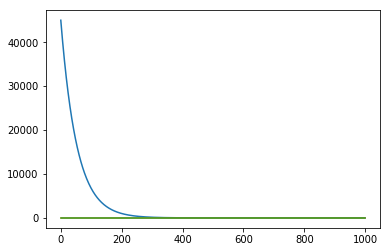

In [8]:
#Generate plasma
pla = plasma(dT,Nx,Lx,Npart,n,Te,Ti)
#fix Electric field profile
pla.E[:,0] = 45e3*np.exp(-pla.x_j/(5*L_De))
#pla.compute_rho()
plt.plot(pla.E)
plt.show()
#plt.plot(pla.rho)
#plt.show()

 9900 divied by a

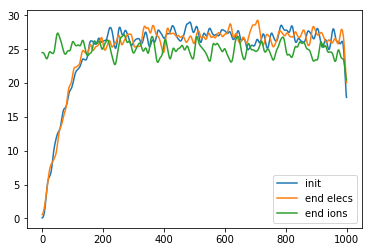

In [13]:
#plt.hist(pla.ele.x,label="start",bins=Nx);
Nt = 10000
n_av = 100
a = 1.2
pla.compute_rho()
plt.plot(smooth(pla.ne),label = "init");

for nt in np.arange(Nt):
    pla.pusher()
    pla.boundary()
    pla.compute_rho()

    #We need to had boundary
    if nt > 1 and nt%n_av ==0:
        ie = pla.history["Ie_c"][-n_av:]
        ii = pla.history["Ii_c"][-n_av:]
        if ie > ii :
            print("\r",nt,"times a",end="")
            pla.E[:,0] *= a
        else:
            print("\r",nt,"divied by a",end="")
            pla.E[:,0] /= a
    
plt.plot(smooth(pla.ne),label = "end elecs");
plt.plot(smooth(pla.ni),label = "end ions");

plt.legend()

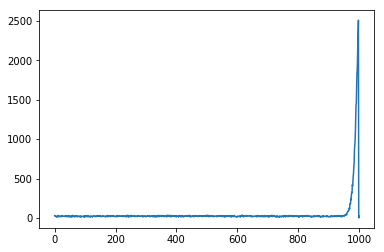

In [10]:


plt.plot(pla.ele.return_density(pla.x_j))

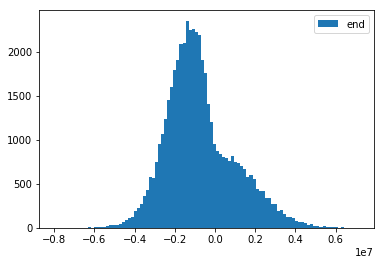

In [21]:
plt.hist(pla.ele.V[:,0],label="end",bins=100);
plt.legend()

In [60]:
from scipy import interpolate

E = [interpolate.interp1d(pla.x_j,pla.E[:,i]) for i in [0,1,2]]

E[0](pla.ion.x)

array([  1.03122977e+02,   1.32669129e+04,   1.73700147e+02, ...,
         7.98743894e-04,   4.13300779e-02,   4.85291573e-04])

In [12]:
pla.ele.V.shape

(49231, 3)

In [15]:
np.array([max_vect(5,pla.ele.T,pla.ele.m),
max_vect(5,pla.ele.T,pla.ele.m),
max_vect(5,pla.ele.T,pla.ele.m)]).T.shape

(5, 3)

In [9]:
np.dtype(float)

dtype('float64')

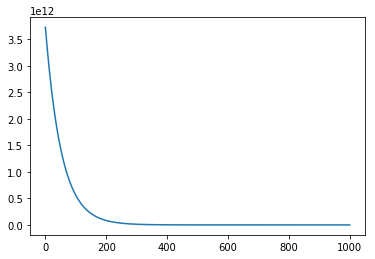

In [10]:
plt.plot(pla.E[:,0])